In [1]:
import pandas as pd
from pathlib import Path

In [2]:
school_data_to_load = Path("Resources/schools_complete.csv")
student_data_to_load = Path("Resources/students_complete.csv")

school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

#Combine the data into a single dataset.  
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
school_data_complete.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


# District Summary

In [3]:
#total number of unique schools
unique_school_name = school_data_complete["school_name"].unique()
count_unique_school_name = len(unique_school_name)
count_unique_school_name

15

In [4]:
total_student = school_data_complete["student_name"].count()
total_student

39170

In [5]:
total_budget = school_data["budget"].sum()
total_budget

24649428

In [6]:
# Average math score
avg_math_score = school_data_complete["math_score"].mean()
avg_math_score

78.98537145774827

In [7]:
# Average reading score
avg_reading_score = school_data_complete["reading_score"].mean()
avg_reading_score

81.87784018381414

In [8]:
#passing math (the percentage of students who passed math)
passing_above_69 = school_data_complete["math_score"]> 69
total_students_math = school_data_complete.loc[passing_above_69].count()["student_name"]
percentage_passing_math = (total_students_math/total_student) *100
percentage_passing_math

74.9808526933878

In [9]:
# passing reading (the percentage of students who passed reading)
passing_above_69 = school_data_complete["reading_score"]> 69
total_students_reading = school_data_complete.loc[passing_above_69].count()["student_name"]
percentage_passing_reading = (total_students_reading/total_student) *100
percentage_passing_reading

85.80546336482001

In [10]:
# overall passing (the percentage of students who passed math AND reading)
passing_math_reading = school_data_complete [(school_data_complete["reading_score"]> 69) & (school_data_complete["math_score"]> 69)]["Student ID"].count()
Overall_passing_math_and_reading = (passing_math_reading/total_student)*100
Overall_passing_math_and_reading


65.17232575950983

In [11]:
#Create a new DataFrame for the above calculations called district_summary (4 points)
data = [{
    "Total Unique Schools": count_unique_school_name, 
    "Total Students": total_student, 
    "Total Budget": total_budget, 
    "Average math Score": avg_math_score, 
    "Average Reading Score": avg_reading_score, 
    "Passing Math": percentage_passing_math, 
    "Passing Reading": percentage_passing_reading ,
    "Overall Passing": Overall_passing_math_and_reading


}] 
district_summary = pd.DataFrame(data)

district_summary["Total Students"] = district_summary["Total Students"].map("{:,}".format)
district_summary["Total Budget"] = district_summary["Total Budget"].map("${:,.2f}".format)

district_summary

,Total Unique Schools,Total Students,Total Budget,Average math Score,Average Reading Score,Passing Math,Passing Reading,Overall Passing
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,65.172326


# School Summary

In [12]:
#Group by school name
school_name = school_data_complete.set_index("school_name").groupby(["school_name"])
school_name.head()

,Student ID,student_name,gender,grade,reading_score,math_score,School ID,type,size,budget
school_name,,,,,,,,,,
Huang High School,0,Paul Bradley,M,9th,66,79,0,District,2917,1910635
Huang High School,1,Victor Smith,M,12th,94,61,0,District,2917,1910635
Huang High School,2,Kevin Rodriguez,M,12th,90,60,0,District,2917,1910635
Huang High School,3,Dr. Richard Scott,M,12th,67,58,0,District,2917,1910635
Huang High School,4,Bonnie Ray,F,9th,97,84,0,District,2917,1910635
...,...,...,...,...,...,...,...,...,...,...
Thomas High School,37535,Norma Mata,F,10th,76,76,14,Charter,1635,1043130
Thomas High School,37536,Cody Miller,M,11th,84,82,14,Charter,1635,1043130
Thomas High School,37537,Erik Snyder,M,9th,80,90,14,Charter,1635,1043130


In [13]:
school_types = school_data.set_index("school_name")["type"]

In [14]:
# calculate the toatl student count
total_students = school_name["Student ID"].count()
total_students

school_name
Bailey High School       4976
Cabrera High School      1858
Figueroa High School     2949
Ford High School         2739
Griffin High School      1468
Hernandez High School    4635
Holden High School        427
Huang High School        2917
Johnson High School      4761
Pena High School          962
Rodriguez High School    3999
Shelton High School      1761
Thomas High School       1635
Wilson High School       2283
Wright High School       1800
Name: Student ID, dtype: int64

In [15]:
#total school budget
total_school_budget = school_data.set_index('school_name')['budget']


In [16]:
# per student budget
per_school_budget = total_school_budget/school_data.set_index('school_name')['size']
per_school_budget

school_name
Huang High School        655.0
Figueroa High School     639.0
Shelton High School      600.0
Hernandez High School    652.0
Griffin High School      625.0
Wilson High School       578.0
Cabrera High School      582.0
Bailey High School       628.0
Holden High School       581.0
Pena High School         609.0
Wright High School       583.0
Rodriguez High School    637.0
Johnson High School      650.0
Ford High School         644.0
Thomas High School       638.0
dtype: float64

In [17]:
per_school_reading = school_name["reading_score"].mean()
per_school_reading

school_name
Bailey High School       81.033963
Cabrera High School      83.975780
Figueroa High School     81.158020
Ford High School         80.746258
Griffin High School      83.816757
Hernandez High School    80.934412
Holden High School       83.814988
Huang High School        81.182722
Johnson High School      80.966394
Pena High School         84.044699
Rodriguez High School    80.744686
Shelton High School      83.725724
Thomas High School       83.848930
Wilson High School       83.989488
Wright High School       83.955000
Name: reading_score, dtype: float64

In [18]:
# Calculate the average test scores
per_school_math = school_name["math_score"].mean()
per_school_math

school_name
Bailey High School       77.048432
Cabrera High School      83.061895
Figueroa High School     76.711767
Ford High School         77.102592
Griffin High School      83.351499
Hernandez High School    77.289752
Holden High School       83.803279
Huang High School        76.629414
Johnson High School      77.072464
Pena High School         83.839917
Rodriguez High School    76.842711
Shelton High School      83.359455
Thomas High School       83.418349
Wilson High School       83.274201
Wright High School       83.682222
Name: math_score, dtype: float64

In [19]:
#% passing math (the percentage of students who passed math)

passing_above_69 = school_data_complete[school_data_complete["math_score"]> 69].groupby("school_name")["Student ID"].count()
math_number_schools_passing = passing_above_69/total_student*100
math_number_schools_passing


school_name
Bailey High School       8.470768
Cabrera High School      4.465152
Figueroa High School     4.968088
Ford High School         4.776615
Griffin High School      3.500128
Hernandez High School    7.898902
Holden High School       1.008425
Huang High School        4.891499
Johnson High School      8.029104
Pena High School         2.323207
Rodriguez High School    6.775594
Shelton High School      4.220066
Thomas High School       3.893286
Wilson High School       5.471024
Wright High School       4.288997
Name: Student ID, dtype: float64

In [20]:
#% passing reading (the percentage of students who passed reading)
pass_above_69 = (school_data_complete[school_data_complete["reading_score"]> 69].groupby("school_name")["Student ID"].count())/total_student*100
pass_above_69


school_name
Bailey High School       10.408476
Cabrera High School       4.603013
Figueroa High School      6.078632
Ford High School          5.545060
Griffin High School       3.640541
Hernandez High School     9.568547
Holden High School        1.049272
Huang High School         6.055655
Johnson High School       9.872351
Pena High School          2.356395
Rodriguez High School     8.189941
Shelton High School       4.309420
Thomas High School        4.061782
Wilson High School        5.626755
Wright High School        4.439622
Name: Student ID, dtype: float64

In [21]:
#% overall passing (the percentage of students who passed math AND reading)

Passing_math_reading = school_data_complete[(school_data_complete["reading_score"]> 69) & (school_data_complete["math_score"]> 69)].groupby("school_name")["Student ID"].count()/total_student*100
Passing_math_reading


school_name
Bailey High School       6.941537
Cabrera High School      4.332397
Figueroa High School     4.005617
Ford High School         3.796273
Griffin High School      3.395456
Hernandez High School    6.333929
Holden High School       0.972683
Huang High School        3.985193
Johnson High School      6.507531
Pena High School         2.223641
Rodriguez High School    5.409752
Shelton High School      4.041358
Thomas High School       3.796273
Wilson High School       5.279551
Wright High School       4.151136
Name: Student ID, dtype: float64

In [31]:
#School Summary Datafram
per_school_summary = pd.DataFrame({
    "School Type" :school_types,
    "Total Students": total_students,
    "Total School Budget":total_school_budget,
    "Per Student Budget":per_school_budget,
    "Average Math Score":per_school_math,
    "Average Reading Score":per_school_reading,
    "Percent Students Pass Math": percentage_passing_math,
    "Percent Students Pass Reading":percentage_passing_reading,
    "Overall Percent Passing":Overall_passing_math_and_reading})

#Formatting
per_school_summary["Total School Budget"] = per_school_summary["Total School Budget"].map("${:,.2f}".format)
per_school_summary["Per Student Budget"] = per_school_summary["Per Student Budget"].map("${:,.2f}".format)
per_school_summary["Average Math Score"] = per_school_summary["Average Math Score"].map("{:,.2f}%".format)
per_school_summary["Average Reading Score"] = per_school_summary["Average Reading Score"].map("{:,.2f}%".format)
per_school_summary["Percent Students Pass Math"] = per_school_summary["Percent Students Pass Math"].map("{:,.2f}%".format)
per_school_summary["Percent Students Pass Reading"] = per_school_summary["Percent Students Pass Reading"].map("{:,.2f}%".format)
per_school_summary["Overall Percent Passing"] = per_school_summary["Overall Percent Passing"].map("{:,.2f}%".format)


# Display the DataFrame
per_school_summary

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,Percent Students Pass Math,Percent Students Pass Reading,Overall Percent Passing
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.05%,81.03%,74.98%,85.81%,65.17%
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.06%,83.98%,74.98%,85.81%,65.17%
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.71%,81.16%,74.98%,85.81%,65.17%
Ford High School,District,2739,"$1,763,916.00",$644.00,77.10%,80.75%,74.98%,85.81%,65.17%
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.35%,83.82%,74.98%,85.81%,65.17%
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.29%,80.93%,74.98%,85.81%,65.17%
Holden High School,Charter,427,"$248,087.00",$581.00,83.80%,83.81%,74.98%,85.81%,65.17%
Huang High School,District,2917,"$1,910,635.00",$655.00,76.63%,81.18%,74.98%,85.81%,65.17%
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.07%,80.97%,74.98%,85.81%,65.17%
Pena High School,Charter,962,"$585,858.00",$609.00,83.84%,84.04%,74.98%,85.81%,65.17%


Highest-Performing Schools by Percentage of Overall Passing

In [32]:
top_schools = per_school_summary.sort_values("Overall Percent Passing", ascending=False)
top_schools.head(5)                                              

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,Percent Students Pass Math,Percent Students Pass Reading,Overall Percent Passing
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.05%,81.03%,74.98%,85.81%,65.17%
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.06%,83.98%,74.98%,85.81%,65.17%
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.71%,81.16%,74.98%,85.81%,65.17%
Ford High School,District,2739,"$1,763,916.00",$644.00,77.10%,80.75%,74.98%,85.81%,65.17%
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.35%,83.82%,74.98%,85.81%,65.17%


Lowest-Performing Schools by Percentage of Overall Passing (5 points)

In [33]:
bottom_schools = per_school_summary.sort_values("Overall Percent Passing", ascending = True)
bottom_schools.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,Percent Students Pass Math,Percent Students Pass Reading,Overall Percent Passing
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.05%,81.03%,74.98%,85.81%,65.17%
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.06%,83.98%,74.98%,85.81%,65.17%
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.71%,81.16%,74.98%,85.81%,65.17%
Ford High School,District,2739,"$1,763,916.00",$644.00,77.10%,80.75%,74.98%,85.81%,65.17%
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.35%,83.82%,74.98%,85.81%,65.17%


Math Scores by Grade

In [34]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# Group by "school_name" and take the mean of each.
ninth_graders_scores = school_data_complete.groupby("school_name").mean()
#or ninth_graders_scores = school_data_complete.groupby("school_name")["math_score"].mean()
tenth_graders_scores =  school_data_complete.groupby("school_name").mean()
eleventh_graders_scores = school_data_complete.groupby("school_name").mean()
twelfth_graders_scores = school_data_complete.groupby("school_name").mean()

# Use the code to select only the `math_score`.
ninth_grade_math_scores = ninth_graders_scores["math_score"]
tenth_grader_math_scores = tenth_graders_scores["math_score"]
eleventh_grader_math_scores = eleventh_graders_scores["math_score"]
twelfth_grader_math_scores = twelfth_graders_scores["math_score"]

# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
math_scores_by_grade = pd.DataFrame({"9th":ninth_grade_math_scores,
                                    "10th":tenth_grader_math_scores,
                                    "11th":eleventh_grader_math_scores,
                                    "12th":twelfth_grader_math_scores})

# Minor data wrangling NOT NEEDED
#math_scores_by_grade.index.name = None

# Display the DataFrame
math_scores_by_grade

,9th,10th,11th,12th
school_name,,,,
Bailey High School,77.048432,77.048432,77.048432,77.048432
Cabrera High School,83.061895,83.061895,83.061895,83.061895
Figueroa High School,76.711767,76.711767,76.711767,76.711767
Ford High School,77.102592,77.102592,77.102592,77.102592
Griffin High School,83.351499,83.351499,83.351499,83.351499
Hernandez High School,77.289752,77.289752,77.289752,77.289752
Holden High School,83.803279,83.803279,83.803279,83.803279
Huang High School,76.629414,76.629414,76.629414,76.629414
Johnson High School,77.072464,77.072464,77.072464,77.072464


Reading Scores by Grade

In [35]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# Group by "school_name" and take the mean of each.
ninth_graders_scores = school_data_complete.groupby("school_name").mean()
tenth_graders_scores = school_data_complete.groupby("school_name").mean()
eleventh_graders_scores = school_data_complete.groupby("school_name").mean()
twelfth_graders_scores = school_data_complete.groupby("school_name").mean()

# Use the code to select only the `reading_score`.
ninth_grade_reading_scores = ninth_graders_scores["reading_score"]
tenth_grader_reading_scores = tenth_graders_scores["reading_score"]
eleventh_grader_reading_scores = eleventh_graders_scores["reading_score"]
twelfth_grader_reading_scores = twelfth_graders_scores["reading_score"]

# Combine each of the scores above into single DataFrame called `reading_scores_by_grade`
reading_scores_by_grade = pd.DataFrame({"9th":ninth_grade_reading_scores,
                                    "10th":tenth_grader_reading_scores,
                                    "11th":eleventh_grader_reading_scores,
                                    "12th":twelfth_grader_reading_scores})

#Not working for some reason
#reading_scores_by_grade.style.format({'9th': '{:.2f}', 
                              #'10th': '{:.2f}', 
                              #'% 11th': '{:.2f}', 
                              #'% 12th':'{:.2f}'})
# Display the DataFrame
reading_scores_by_grade

,9th,10th,11th,12th
school_name,,,,
Bailey High School,81.033963,81.033963,81.033963,81.033963
Cabrera High School,83.975780,83.975780,83.975780,83.975780
Figueroa High School,81.158020,81.158020,81.158020,81.158020
Ford High School,80.746258,80.746258,80.746258,80.746258
Griffin High School,83.816757,83.816757,83.816757,83.816757
Hernandez High School,80.934412,80.934412,80.934412,80.934412
Holden High School,83.814988,83.814988,83.814988,83.814988
Huang High School,81.182722,81.182722,81.182722,81.182722
Johnson High School,80.966394,80.966394,80.966394,80.966394


Scores by School Spending

In [50]:
# Establish the bins 
spending_bins = [0, 585, 630, 645, 680]
labels = ["<$585", "$585-630", "$630-645", "$645-680"]

# Create a copy of the school summary since it has the "Per Student Budget" 
school_spending_df = per_school_summary.copy()

In [51]:
# Use `pd.cut` to categorize spending based on the bins.
school_spending_df["Spending Ranges (Per Student)"] = pd.cut(school_data_complete['budget']/school_data_complete['size'], spending_bins, labels = labels)
school_spending_df



,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,Percent Students Pass Math,Percent Students Pass Reading,Overall Percent Passing,Spending Ranges (Per Student)
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.05%,81.03%,74.98%,85.81%,65.17%,NaN
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.06%,83.98%,74.98%,85.81%,65.17%,NaN
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.71%,81.16%,74.98%,85.81%,65.17%,NaN
Ford High School,District,2739,"$1,763,916.00",$644.00,77.10%,80.75%,74.98%,85.81%,65.17%,NaN
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.35%,83.82%,74.98%,85.81%,65.17%,NaN
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.29%,80.93%,74.98%,85.81%,65.17%,NaN
Holden High School,Charter,427,"$248,087.00",$581.00,83.80%,83.81%,74.98%,85.81%,65.17%,NaN
Huang High School,District,2917,"$1,910,635.00",$655.00,76.63%,81.18%,74.98%,85.81%,65.17%,NaN
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.07%,80.97%,74.98%,85.81%,65.17%,NaN
Pena High School,Charter,962,"$585,858.00",$609.00,83.84%,84.04%,74.98%,85.81%,65.17%,NaN


In [40]:
#  Calculate averages for the desired columns. 
avg_math = school_spending_df['Average Math Score'].mean()
avg_read = school_spending_df['Average Reading Score'].mean()
pass_math = school_data_complete[school_data_complete['math_score'] >= 70].groupby('spending_bins')['Student ID'].count()/by_spending['Student ID'].count()*100
pass_read = school_data_complete[school_data_complete['reading_score'] >= 70].groupby('spending_bins')['Student ID'].count()/by_spending['Student ID'].count()*100
overall = school_data_complete[(school_data_complete['reading_score'] >= 70) & (school_data_complete['math_score'] >= 70)].groupby('spending_bins')['Student ID'].count()/by_spending['Student ID'].count()*100
    

spending_summary = pd.DataFrame({
    "Average Math Score": avg_math,
    "Average Reading Score": avg_read,
    "% Passing Math": pass_math,
    "% Passing Reading": pass_read,
    "% Overall Passing": overall})

spending_summary

NameError: name 'spending_math_scores' is not defined

Scores by School Size

In [81]:
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
labels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [82]:
# Categorize the spending based on the bins
# Use `pd.cut` on the "Total Students" column of the `per_school_summary` DataFrame.

per_school_summary["School Size"] =  pd.cut(school_data_complete['size'], size_bins, labels = labels)
per_school_summary

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,Percent Students Pass Math,Percent Students Pass Reading,Overall Percent Passing,School Size
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.05%,81.03%,8.47%,10.41%,6.94%,NaN
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.06%,83.98%,4.47%,4.60%,4.33%,NaN
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.71%,81.16%,4.97%,6.08%,4.01%,NaN
Ford High School,District,2739,"$1,763,916.00",$644.00,77.10%,80.75%,4.78%,5.55%,3.80%,NaN
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.35%,83.82%,3.50%,3.64%,3.40%,NaN
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.29%,80.93%,7.90%,9.57%,6.33%,NaN
Holden High School,Charter,427,"$248,087.00",$581.00,83.80%,83.81%,1.01%,1.05%,0.97%,NaN
Huang High School,District,2917,"$1,910,635.00",$655.00,76.63%,81.18%,4.89%,6.06%,3.99%,NaN
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.07%,80.97%,8.03%,9.87%,6.51%,NaN
Pena High School,Charter,962,"$585,858.00",$609.00,83.84%,84.04%,2.32%,2.36%,2.22%,NaN


In [ ]:
# Calculate averages for the desired columns. 
size_math_scores = per_school_summary.groupby(["School Size"]).mean()["Average Math Score"]
size_reading_scores = per_school_summary.groupby(["School Size"]).mean()["Average Reading Score"]
size_passing_math = per_school_summary.groupby(["School Size"]).mean()["% Passing Math"]
size_passing_reading = per_school_summary.groupby(["School Size"]).mean()["% Passing Reading"]
size_overall_passing = per_school_summary.groupby(["School Size"]).mean()["% Overall Passing"]

# Use the scores above to create a new DataFrame called `size_summary`
size_summary = pd.DataFrame({
    "Average Math Score": size_math_scores,
    "Average Reading Score": size_reading_scores,
    '% Passing Math': size_passing_math,
    '% Passing Reading': size_passing_reading,
    '% Overall Passing': size_overall_passing
            
})
# Display results
size_summary


Scores by School Type


In [56]:
# Group the per_school_summary DataFrame by "School Type" and average the results.
school_type = school_data_complete.groupby("type")

# Use the code provided to select new column data
average_math_score_by_type = school_type['math_score'].mean()
average_reading_score_by_type = school_type['reading_score'].mean()
average_percent_passing_math_by_type = school_data_complete[school_data_complete['math_score'] >= 70].groupby('type')['Student ID'].count()/school_type['Student ID'].count()*100
average_percent_passing_reading_by_type = school_data_complete[school_data_complete['reading_score'] >= 70].groupby('type')['Student ID'].count()/school_type['Student ID'].count()*100
average_percent_overall_passing_by_type = school_data_complete[(school_data_complete['reading_score'] >= 70) & (school_data_complete['math_score'] >= 70)].groupby('type')['Student ID'].count()/school_type['Student ID'].count()*100



In [57]:
# Assemble the new data by type into a DataFrame called `type_summary`
type_summary = pd.DataFrame({
    "Average Math Score": average_math_score_by_type,
    "Average Reading Score": average_reading_score_by_type,
    '% Passing Math': average_percent_passing_math_by_type,
    '% Passing Reading': average_percent_passing_reading_by_type,
    "% Overall Passing": average_percent_overall_passing_by_type})

# Display results
type_summary

type_summary.style.format({'Average Math Score': '{:.2f}', 
                              'Average Reading Score': '{:.2f}', 
                              '% Passing Math': '{:.2f}', 
                              '% Passing Reading':'{:.2f}', 
                              '% Overall Passing': '{:.2f}'})

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
type,,,,,
Charter,83.41,83.90,93.70,96.65,90.56
District,76.99,80.96,66.52,80.91,53.70


Written Report
Summarizes the analysis:

The dataset shows a total of 15 schools with over 39170 students and a total budget of $24,649,428. With an average reading score of 81.87% vs the math score being only 74.98%. Thus, illustrating that students score more in reading than math. Additionally, by calculating the total students per school we can summarize that District schools due to their larger area of coverage have a higher amount of student’s vs Charters.


Draws two correct conclusions or comparisons from the calculations:

1. Charter type of schools have less funding however, still out shine District schools by having a higher average score on the overall subjects of math and reading per the Scores by School type chart. Additionally, the Highest-Performing (top 5) chart also shows, that Charter schools’ budget is less than that of district schools.

2. District schools may have more budget overall for their students however, Charter schools maybe utilizing their smaller budgets more for the students learning. As higher scores than been seen in Charter school’s vs District. Thus, a student in a smaller Charter school is benefiting from more 1 on 1 time with their teacher vs those in a District. 

3. Math is a harder subject to get higher grades in verses reading. This can be seen in both Charter and District students as the charts indicate higher scores in reading for both school types. 

4. Lastly, the data revealed that researchers should look into finding a reasonable expectation for school sizes that would benefit the students and teachers. By having higher student count with large funding did not result in higher reading and math scores as seen in the analysis. Thus, researchers should see what directly affects the students learning ability vs just increasing the budget for schools each year expecting the students to have higher scores.
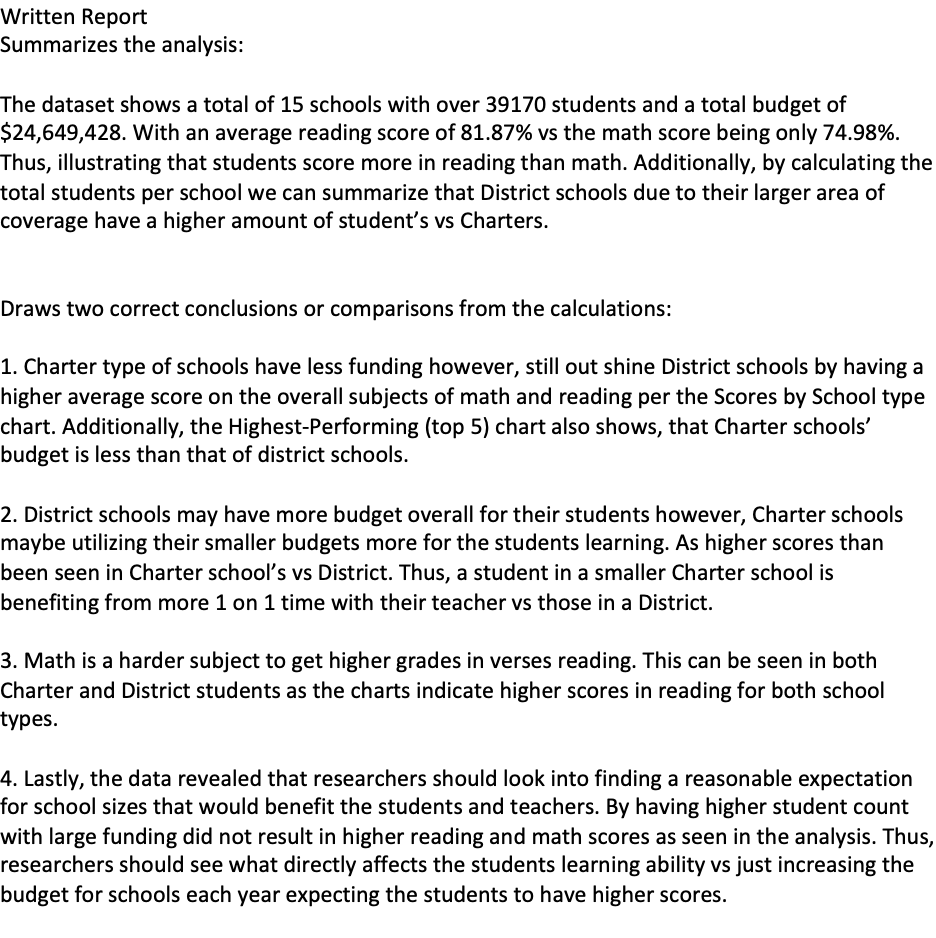